<a href="https://colab.research.google.com/github/dayanaviana/WGU/blob/main/207-Project/1_SummaryStatistics_QuantitativeData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import into data frame
import pandas as pd
churn = "https://raw.githubusercontent.com/dayanaviana/WGU/main/datasources/churn_clean.csv"
df = pd.read_csv(churn, index_col=0)

df_churn_yes = df[df["Churn"]=="Yes"]
df_churn_no = df[df["Churn"]=="No"]

# Descriptive Statistics
Describe and summarize data

## Numeric (Quantitative)



Income
Max: 258900.7
Min: 348.67
Mean: 39806.93
Median: 33170.60
Mode: [10530.09]
Variance: 795155778.45
St. Dev: 28198.51
               mean     median
Churn                         
No     39706.395664  33020.445
Yes    40085.758332  33609.940




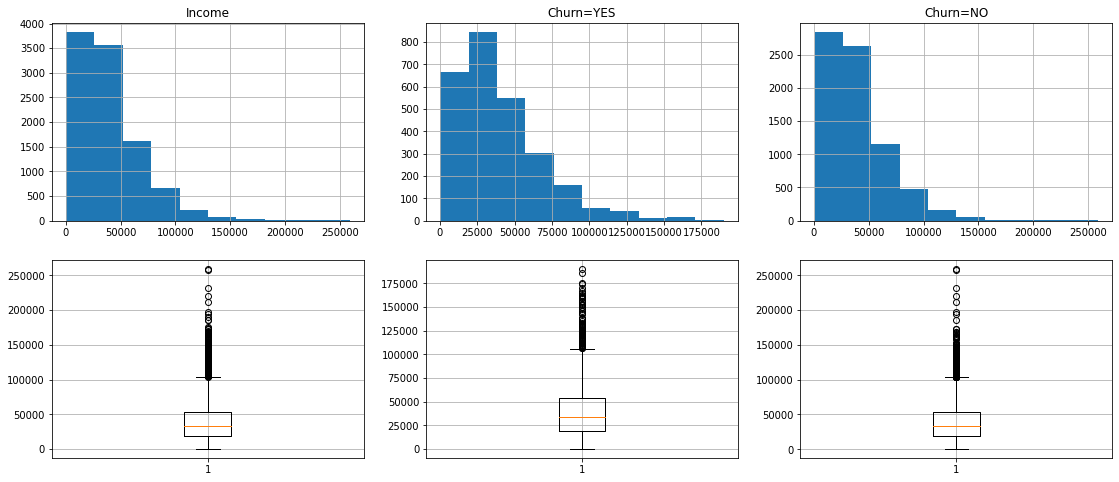



Tenure
Max: 71.99928
Min: 1.00025934
Mean: 34.53
Median: 35.43
Mode: [55.44991]
Variance: 699.17
St. Dev: 26.44
            mean     median
Churn                      
No     42.234090  53.774145
Yes    13.147667   7.874490




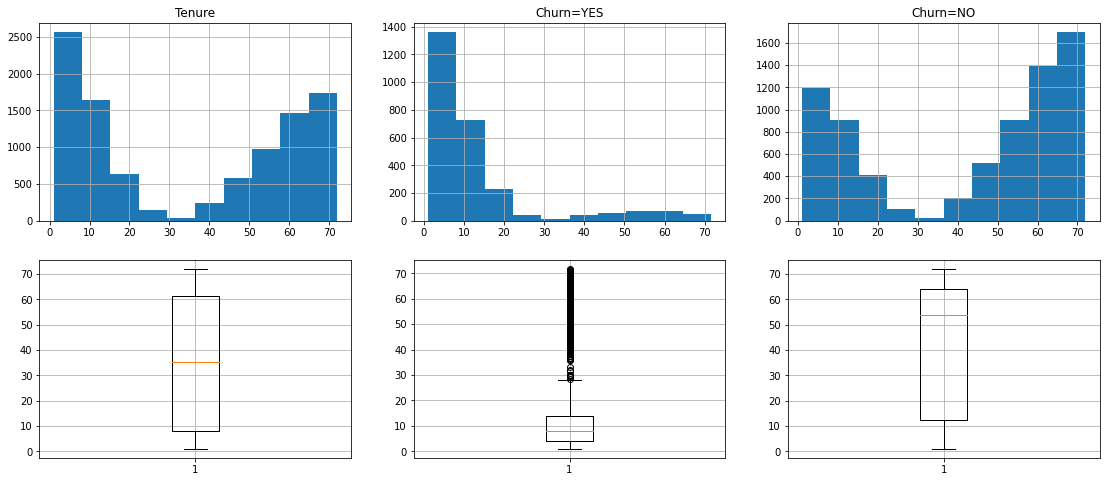



Outage_sec_perweek
Max: 21.20723
Min: 0.09974694
Mean: 10.00
Median: 10.02
Mode: [10.07036]
Variance: 8.86
St. Dev: 2.98
            mean    median
Churn                     
No     10.002128  10.03583
Yes    10.001073   9.96119




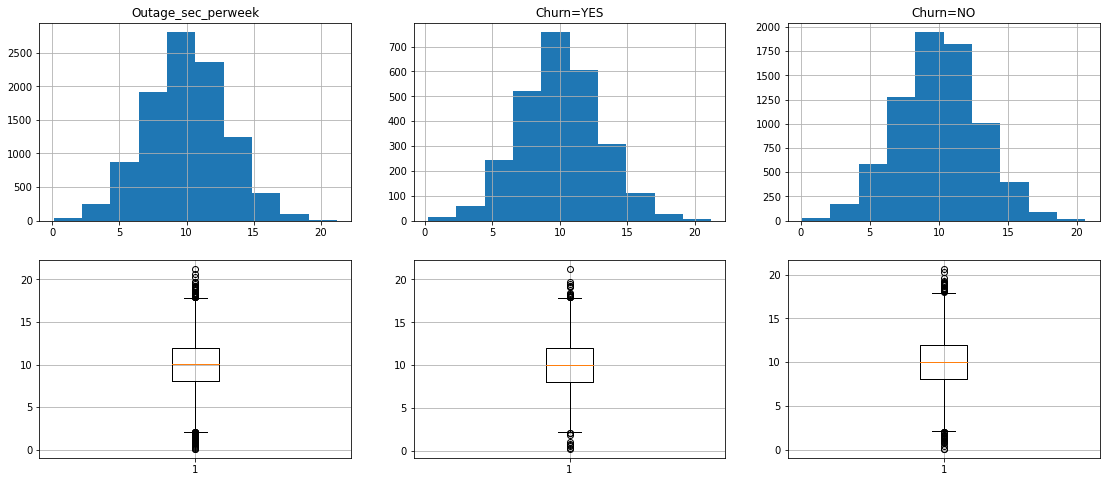



MonthlyCharge
Max: 290.160419
Min: 79.97886
Mean: 172.62
Median: 167.48
Mode: [179.9476]
Variance: 1843.92
St. Dev: 42.94
             mean    median
Churn                      
No     163.008973  159.9642
Yes    199.295175  200.1185




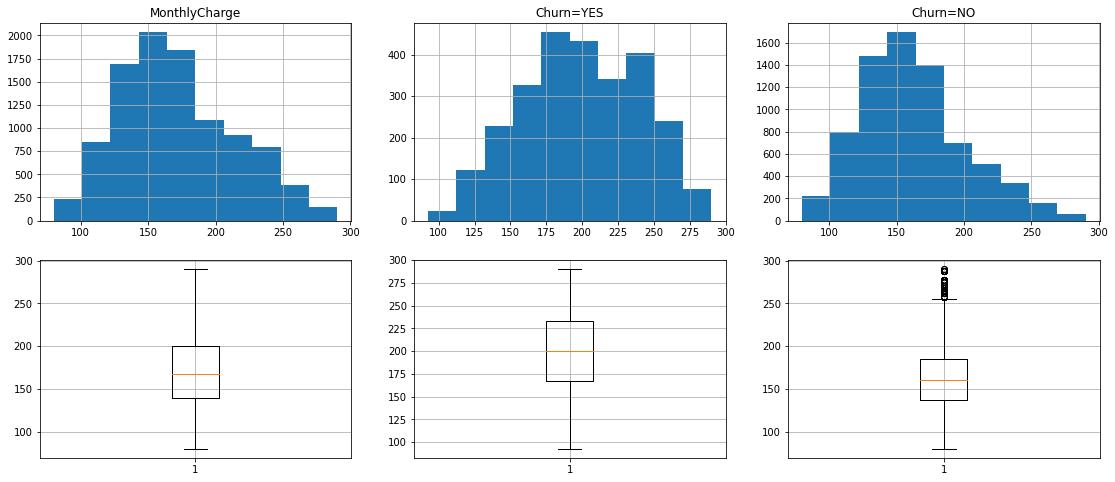



Bandwidth_GB_Year
Max: 7158.98153
Min: 155.5067148
Mean: 3392.34
Median: 3279.54
Mode: [155.5067148]
Variance: 4775036.04
St. Dev: 2185.19
              mean       median
Churn                          
No     3971.855917  4895.174571
Yes    1785.009247  1357.828274




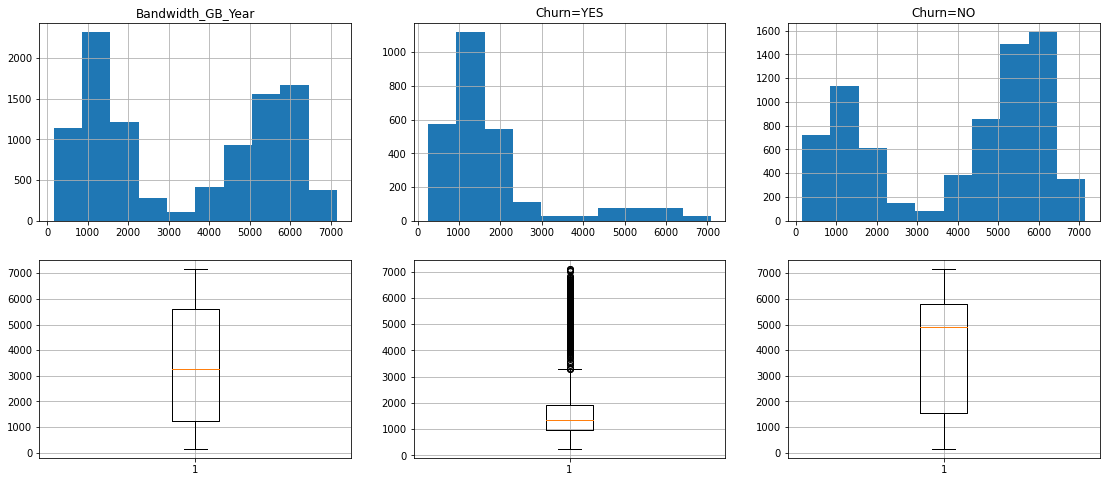



Population
Max: 111850
Min: 0
Mean: 9756.56
Median: 2910.50
Mode: [0]
Variance: 208281960.64
St. Dev: 14431.98
              mean  median
Churn                     
No     9830.510340    2906
Yes    9551.461509    2918




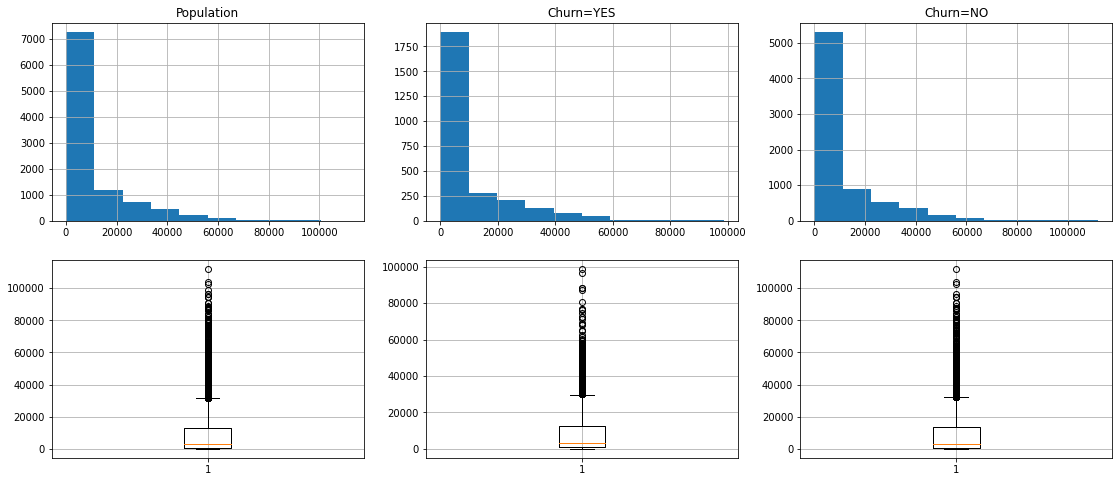



Children
Max: 10
Min: 0
Mean: 2.09
Median: 1.00
Mode: [0]
Variance: 4.61
St. Dev: 2.15
           mean  median
Churn                  
No     2.093197     1.0
Yes    2.072453     1.5




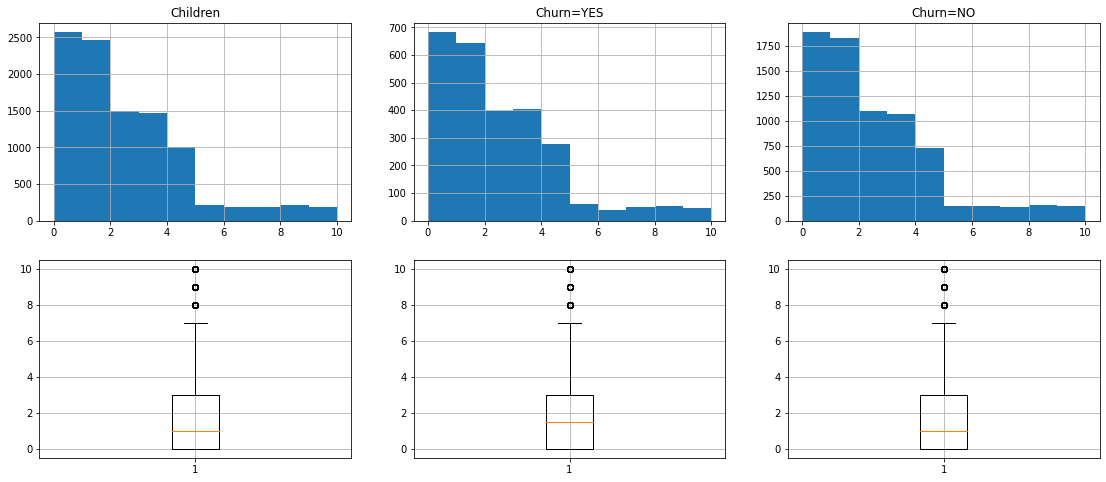



Age
Max: 89
Min: 18
Mean: 53.08
Median: 53.00
Mode: [32]
Variance: 428.40
St. Dev: 20.70
            mean  median
Churn                   
No     53.008435      53
Yes    53.272453      53




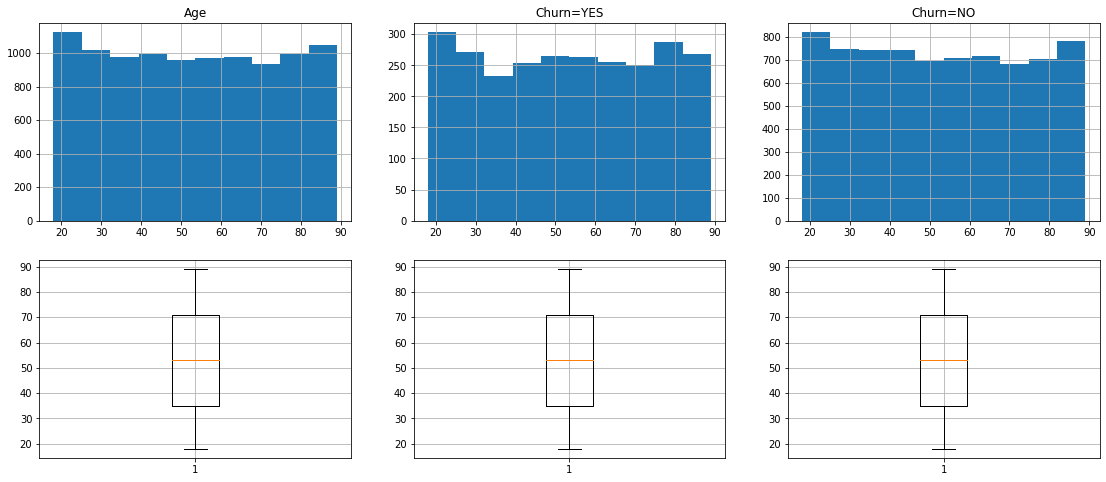



Yearly_equip_failure
Max: 6
Min: 0
Mean: 0.40
Median: 0.00
Mode: [0]
Variance: 0.40
St. Dev: 0.64
           mean  median
Churn                  
No     0.404082       0
Yes    0.381132       0




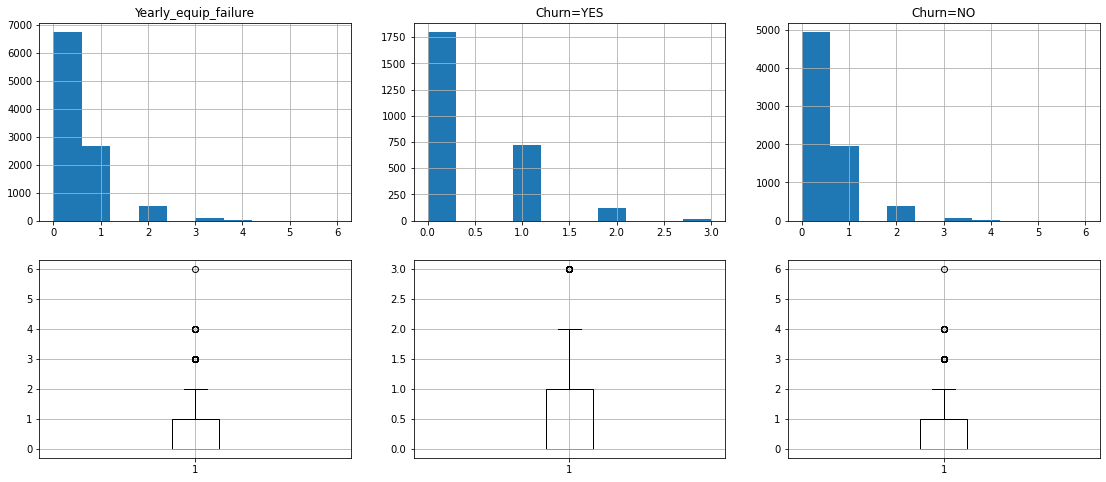



Email
Max: 23
Min: 1
Mean: 12.02
Median: 12.00
Mode: [12]
Variance: 9.16
St. Dev: 3.03
            mean  median
Churn                   
No     11.993605      12
Yes    12.078113      12




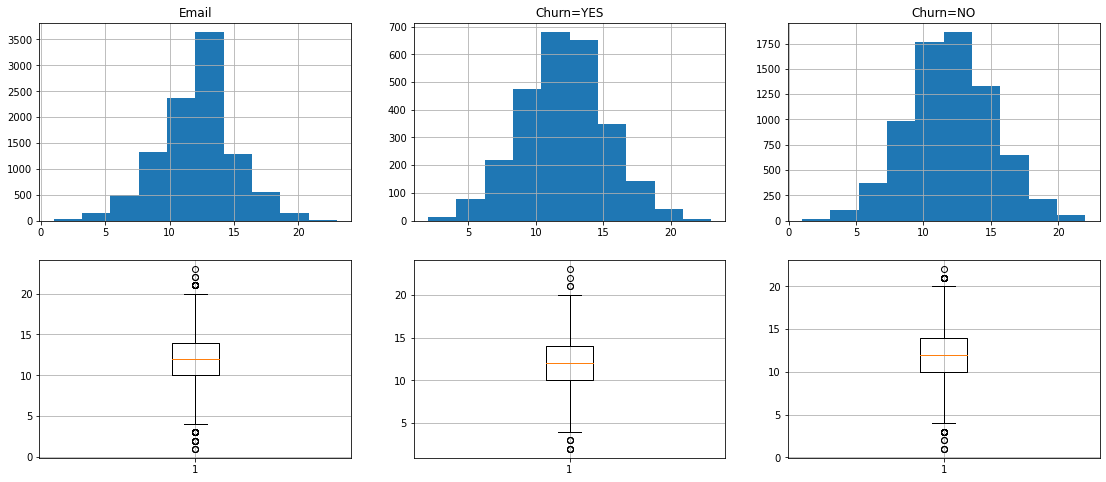



Contacts
Max: 7
Min: 0
Mean: 0.99
Median: 1.00
Mode: [0]
Variance: 0.98
St. Dev: 0.99
           mean  median
Churn                  
No     0.989116       1
Yes    1.008302       1




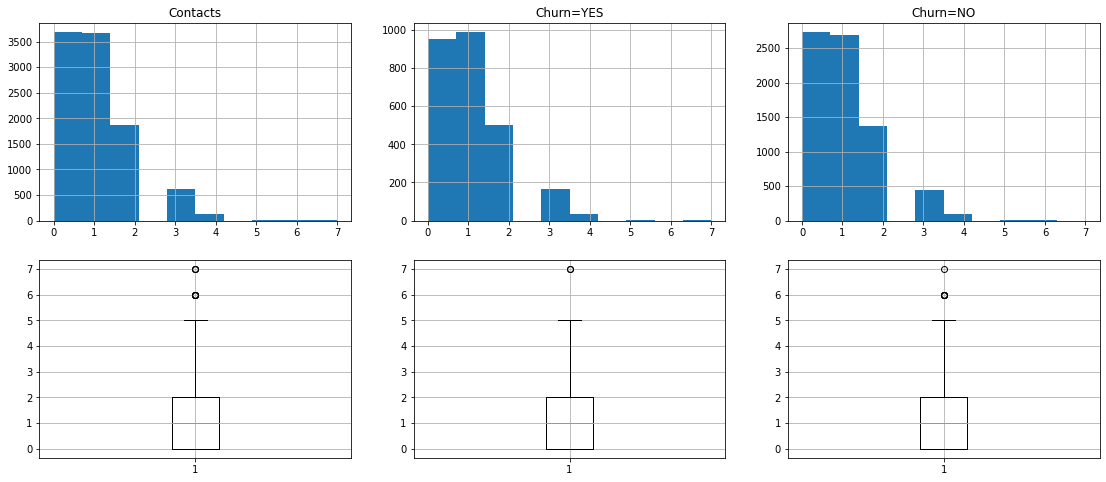

In [8]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt 
import plotnine as p9

columns_array = ["Income", 
                 "Tenure", 
                 "Outage_sec_perweek", 
                 "MonthlyCharge", 
                 "Bandwidth_GB_Year",
                 "Population",
                 "Children",
                 "Age",
                 "Yearly_equip_failure",
                 "Email",
                 "Contacts"
                 ]

for column_name in columns_array:
  print("\n")
  print(column_name)
  max = np.max(df[column_name])
  print("Max:", max)
  min = np.min(df[column_name])
  print("Min:", min)
  mean = "{:.2f}".format(np.mean(df[column_name]))
  print("Mean:", mean)
  median =  "{:.2f}".format(np.median(df[column_name]))
  print("Median:", median)

   # Python 3.8
  # import statistics
  # mode =  statistics.multimode(df[column_name])
  mode =  stats.mode(df[column_name])
  print("Mode:", mode[0])
  
  var =  "{:.2f}".format(np.var(df[column_name]))
  print("Variance:", var)
  stddev =  "{:.2f}".format(np.std(df[column_name]))
  print("St. Dev:", stddev)

  # Aggregate data
  #agg([np.mean, np.median, np.max, np.min, np.var, np.std]
  # Subset by Churn status
  df_grouped = df.groupby("Churn")[column_name].agg([np.mean, np.median])
  print(df_grouped)
  print("\n")

  # Histogram and show plot 
  # Plot size: 1900px x 800px
  plt.subplots(figsize=(19, 8))
  # configure supplot(nrows,ncols,nsubplots) 
  plt.subplot(2,3,1) 
  plt.hist(df[column_name]) 
  plt.grid(True)
  plt.title(column_name)
  plt.subplot(2,3,2) 
  plt.hist(df_churn_yes[column_name]) 
  plt.grid(True)
  plt.title("Churn=YES")
  plt.subplot(2,3,3) 
  plt.hist(df_churn_no[column_name]) 
  plt.grid(True)
  plt.title("Churn=NO")
  # Boxplots
  plt.subplot(2,3,4) 
  plt.boxplot(df[column_name])
  plt.grid(True)
  plt.subplot(2,3,5) 
  plt.boxplot(df_churn_yes[column_name])
  plt.grid(True)
  plt.subplot(2,3,6) 
  plt.boxplot(df_churn_no[column_name])
  plt.grid(True)
  plt.show() 

  # print(p9.ggplot(df)+p9.aes(x='Churn', y=column_name,)+p9.geom_boxplot())


# Insigts

- Low **Tenure**: churn clients median stay is 7 months, while non-churn stay for 53 months

- High **MonthlyCharge**: churn clients pay in avg `$`199.29, while non-churn pay `$`163.00

- Low **Bandwidth_GB_Year**: churn clients median use is 1,357.83 GB per year, while non-churn use is 4,895.17 GB per year.

*If data is skewed, MEDIAN is usually better to use *italicized text*